In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
import math
import seaborn as sns

df = pd.read_csv("../Dataset/dataset_phishing.csv")

In [2]:
# Exploracion de datos
# Para saber las columnas del dataset
print(list(df.columns))

# Para saber si el dataset esta balanceado
print("- - - - - - - BALANCEO - - - - - - -")
print(df["status"].value_counts())

# Obtener tipos de datos
tipos_de_datos = df.dtypes.value_counts()

# Mostrar tipos de datos con nombres de columnas
print("- - - - - - - TIPOS DE DATOS - - - - - - -")
print(tipos_de_datos)

# Buscando valores nulls
print("- - - - - - - VALORES NULLS - - - - - - -")
nulos = df.isnull()
print(nulos)

nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))

['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'rat

In [3]:
# Convirtiendo Columna status a numerica
df["status"] = df["status"].map({"phishing": 1, "legitimate": 0})


# Columna innecesaria porque ya se tiene su longitud
dfProcessed = df.drop('url', axis=1)

print(list(dfProcessed.columns))
nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))

['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intR

(9144, 87)
(9144,)
<class 'numpy.ndarray'>


C:\Users\Francis\AppData\Local\Temp\ipykernel_3276\876332677.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


[ 1.97207104e+00  2.08516178e+02  6.79686859e+01  1.15969757e+00
  6.87879042e+00 -1.20721559e+00  2.71363338e-01  1.13871524e+00
  1.06375914e+00  0.00000000e+00  2.10628418e+00  5.76382217e-01
  3.18659236e-02  3.11139781e-01  1.23903632e+01  5.98152127e-03
  2.25364925e+00  1.16182603e-02  4.25327539e-01  1.60219812e-02
  8.64949062e-03 -1.56163040e+00  7.05356592e-01  4.88778267e-02
  8.90978010e-02  1.73795331e+00  3.51867719e-01  2.13443382e-01
  1.96030068e-03  5.54154717e-03  2.53371711e-01  3.60189221e-01
  1.36268610e-01  4.70518667e+00  1.20419033e+00  1.36503349e-01
  8.76930727e-01 -7.09905946e-04  7.91844886e-01  1.37848094e-02
  1.80684301e+01  3.93363842e+00  6.20793145e+00  1.98282864e+01
  6.27096016e+00  6.30833866e+01  2.85499459e+01  5.42596344e+01
  2.06362550e+01  2.35277920e+01  2.01493751e+01  3.47539067e+00
  4.04718686e-01  3.58903473e-02  4.57792355e-02  1.46311031e-01
  3.74008092e-01 -3.65922087e+02  4.62038622e-02  1.10308826e+00
  0.00000000e+00  1.84746

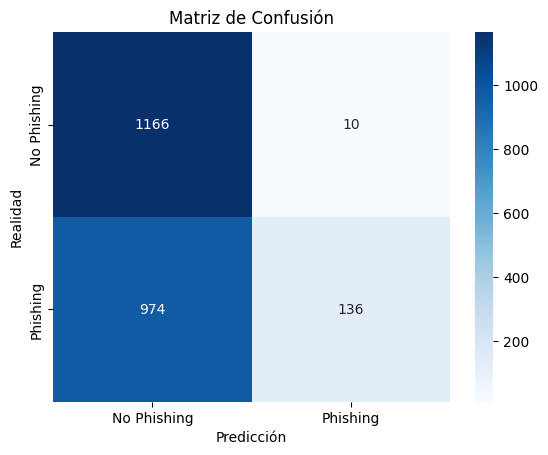

In [11]:
data = dfProcessed
split_index = int(len(data) * 0.8)

X = data.drop("status", axis=1).iloc[:split_index, :]
y = data["status"].iloc[:split_index]

X_test = data.drop("status", axis=1).iloc[split_index:, :]
Y_test = data["status"].iloc[split_index:]

print(X.shape)
print(y.shape)

X = X.values
print(type(X))
y = y.values

# weights
theta = np.zeros(X.shape[1] + 1) # +1 for the bias


# funcion simboidem, en donde z es un vector 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# funcion de perdida 

def cost_function(X, y, theta):
    m = len()
    h = sigmoid(X.dot(theta))
    J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))  
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        X_with_bias = np.hstack([np.ones((m, 1)), X])

        h = sigmoid(X_with_bias @ theta)  # Use X_with_bias for both h and gradient
        gradient = 1/m * X_with_bias.T @ (h - y)  # Calculate gradient with bias
        theta -= alpha * gradient  # Update parameters

    return theta

alpha = 0.01  # Learning rate
iterations = 1800  # Number of iterations

theta = gradient_descent(X, y, theta, alpha, iterations) 
print(theta)

def predict(X, theta):
    """Makes predictions using the trained logistic regression model and returns 1s and 0s."""

    # Add a column of ones to X for the bias term
    X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

    z = X_with_bias @ theta  # Calculate predictions with bias

    # Convert boolean results to 1s and 0s using np.where
    predictions = np.where(sigmoid(z) >= 0.5, 1, 0)

    return predictions  # Return the array of 1s and 0s



y_pred = predict(X_test, theta)
cm = confusion_matrix(Y_test, y_pred)
score = accuracy_score(Y_test, y_pred)
print("accuracy score: ", score)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Phishing', 'Phishing'], yticklabels=['No Phishing', 'Phishing'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

